# Discretización del Espacio

Diferencia entre  Número de Discretizaciones y Número de Intervalos:

$$
N_{discretizaciones} = N_{invervalos} + 1 
$$

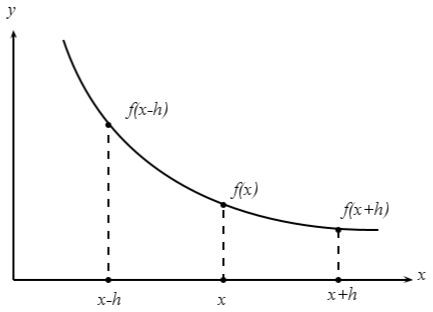

### Notación


Supongamos que queremos discretizar el espacio $x$, con $N$ invervalos de tamaño $h$, de forma que 

$$ 
h = \frac{x_f - x_0}{N}
$$

con $x_0$, $x_f$ los valores inicial y final de $x$ en nuestra discretización.

En general $x_i$ será el $i$-ésimo valor de $x$, con:

$$
x_i = x_0 + i \cdot h, \ \forall i: 0 \leq i \leq N
$$

siendo $x_0$ nuestro valor más chico de $x$.

Si $x$ está discretizado, también lo estarán los valores de una función genérica $f(x)$. De forma similar tendremos:

$$
f_i = f(x_i)
$$

Y podemos expresar:

$$
f_{i + j} = f(x_i + j\cdot h) \\
f_{i - j} = f(x_i - j\cdot h)
$$

Discretizemos el espacio:

In [1]:
# Usando Python Puro

# Variables
x0, xf = 0, 1
N = 10          # Número de Intervalos
h = (xf -x0)/N  # Tamaño del intervalo
x = []          # Grilla de puntos x

# Discretización
for i in range(N+1):
    xi = x0 + i*h
    x.append(xi)

print(x)

[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]


In [3]:
# Usando Numpy
import numpy as np

# Variables
x0, xf = 0, 1
N = 10

x = np.linspace(x0, xf, N + 1)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


# Método de Euler

Este método nos permite resolver una EDO de la forma:
$$
\frac{dy}{dx} = f(x, y) , \ \ y(x_0) = y_0
$$

Básicamente consideramos que $ \frac{dy}{dx} \approx \frac{\Delta y}{\Delta x}$, de forma que 

$$
\frac{y_{n+1} - y_{n}}{\Delta x} = f(x_n, y_n)
$$



Despejando $y_{n+1}$ y llamando $h = \Delta x$:

$$
\boxed{y_{n+1} = y_n + h\cdot f(x_n, y_n)}
$$

De esta forma, si tenemos $y_0$ podemos calcular $y_1$ y así iterativamente.


## Ejemplo 1

Resolvamos la siguiente EDO:
$$
\frac{dy}{dx} = y , \ \ y(0) = 1
$$

2.704813829421526 aproximación de e
2.718281828459045 valor real de e


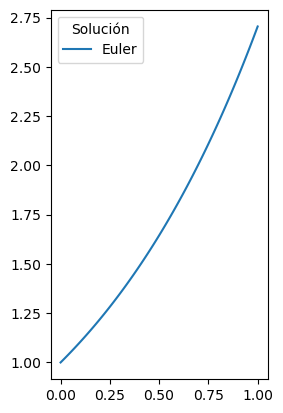

In [4]:
import matplotlib.pyplot as plt
import math

# dy/dx = f(x, y)
def f(x, y):
    return y

# variables 
x0, xf = 0, 1           # Dominio x
y0 = 1                  # Condicion Inicial
h = 0.01                # Tamaño del intervalo (paso)
N = round((xf - x0)/h)  # Número de Intervalos (aproximadamente)
lista_x = [x0]          
lista_y = [y0]

# 
for i in range(N):
    # Los puntos xi, yi
    xi = lista_x[-1]
    yi = lista_y[-1]

    # Calculo los puntos x_i+1, y_i+1
    x_nueva = xi + h
    y_nueva = yi + h*f(xi, yi)

    # Agrego los puntos a sus respectivas listas
    lista_x.append(x_nueva)
    lista_y.append(y_nueva)

print(lista_y[-1], "aproximación de e")
print(math.e, "valor real de e")

plt.plot(lista_x, lista_y, label="Euler")
plt.legend(title="Solución")
plt.axis("scaled")
plt.show()

### ¿Y si creamos una función para el método de Euler?

Podemos escribir una función que nos permita reutilizar el método de una forma más sencilla

In [9]:
def euler_N(f, x0, xf, y0, N = None):
    """Regresa las grillas x e y luego de aplicar el método de Euler
    Este método nos permite resolver la EDO:
    dy/dx = f(x, y), y(xa) = y0

    Parameters:
        f (function): la función f(x, y).
        xa (float): x inicial
        xb (float): x final
        y0 (float): Condición inicial y(xa) = y0
        N (int): Número de divisiones del dominio

    Returns:
        tuple: un tuple con dos arrays (x, y) cada una de tamaño N + 1
    """
    import numpy as np

    x = np.linspace(x0, xf, N + 1)
    h = (xf - x0)/N 
    y = [y0]

    for x_n in x[:-1]:
        y_n = y[-1]
        y_nueva = y_n + h*f(x_n, y_n)   # Euler
        y.append(y_nueva)               # Agrego y_n+1 a la grilla de y
    
    # convierto y en un array
    y = np.array(y)
    
    return x, y

def euler_h(f, x0, xf, y0, h):
    """Regresa las grillas x e y luego de aplicar el método de Euler
    Este método nos permite resolver la EDO:
    dy/dx = f(x, y), y(xa) = y0

    Parameters:
        f (function): la función f(x, y).
        xa (float): x inicial
        xb (float): x final
        y0 (float): Condición inicial y(xa) = y0
        h (float): Tamaño del intervalo

    Returns:
        tuple: un tuple con dos arrays (x, y) cada una de tamaño N + 1
    """
    import numpy as np
    
    N = round((xf - x0)/h)
    x = np.linspace(x0, xf, N + 1)
    y = [y0]

    for x_n in x[:-1]:
        y_n = y[-1]
        y_nueva = y_n + h*f(x_n, y_n)   # Euler
        y.append(y_nueva)               # Agrego y_n+1 a la grilla de y
    
    # convierto y en un array
    y = np.array(y)
    
    return x, y


## Ejemplo 2

Dada la EDO:
$$
\frac{dy}{dx} = \frac{4}{1+x^2} , \ \ y(0) = 0
$$

Queremos obtener:

$$ \pi = y(1) $$

In [11]:
def f(x, y):
    return 4/(1+x**2)

# Variables
x0 = 0
xf = 1
N = 1_000
y0 = 0

# Esta vez directamente uso mi Función de Euler
x, y = euler_N(f, x0, xf, y0, N)

pi_euler = y[-1]
print(f"Aproimacion pi = {pi_euler}")

Aproimacion pi = 3.142592486923122


# Método de Euler Mejorado o de Punto Medio

En el método de Euler mejorado mejoramos la aproximación de la pendiente a partir de un promedio entre el punto $n$ y el punto $n+1$

\begin{align*}
k_1 =&\  f(x_n, y_n)\\
u_{n+1} =& \ y_n + h\cdot f(x_n, y_n)  \\
k2 =& \ f(x_{n+1}, u_{n+1}) \\
y_{n+1} =& \ y_n + h\cdot \frac{1}{2}(k_1+k_2)
\end{align*}


Escribamos las funciones para el método de Euler Mejorado:

In [12]:
def euler_mejorado_N(f, x0, xf, y0, N = None):
    """Regresa las grillas x e y luego de aplicar el método de Euler mejorado
    Este método nos permite resolver la EDO:
    dy/dx = f(x, y), y(xa) = y0

    Parameters:
        f (function): la función f(x, y).
        xa (float): x inicial
        xb (float): x final
        y0 (float): Condición inicial y(xa) = y0
        N (int): Número de divisiones del dominio

    Returns:
        tuple: un tuple con dos arrays (x, y) cada una de tamaño N + 1
    """
    h = (xf - x0)/N 
    y = [y0]
    x = [x0]

    for i in range(1, N+1):
        xi = x[-1]
        yi = y[-1]

        # Euler mejorado
        k1 = f(xi, yi)
        u = yi + h*k1
        k2 = f(xi + h, u)
        y_nueva = yi + h*0.5*(k1 + k2) 

        # Agrego y_n+1 a la grilla de y
        y.append(y_nueva)          
        x.append(x0 + i*h) 
    
    # convierto y en un array
    #y = np.array(y)
    
    return x, y

def euler_mejorado_h(f, x0, xf, y0, h):
    """Regresa las grillas x e y luego de aplicar el método de Euler
    Este método nos permite resolver la EDO:
    dy/dx = f(x, y), y(xa) = y0

    Parameters:
        f (function): la función f(x, y).
        xa (float): x inicial
        xb (float): x final
        y0 (float): Condición inicial y(xa) = y0
        h (float): Tamaño del intervalo

    Returns:
        tuple: un tuple con dos arrays (x, y) cada una de tamaño N + 1
    """
    N = round((xf - x0)/h)
    y = [y0]
    x = [x0]

    for i in range(1, N+1):
        xi = x[-1]
        yi = y[-1]

        # Euler mejorado
        k1 = f(xi, yi)
        u = yi + h*k1
        k2 = f(xi + h, u)
        y_nueva = yi + h*0.5*(k1 + k2) 
        
        # Agrego los nuevos puntos
        y.append(y_nueva)        
        x.append(x0 + i*h)       
    
    # convierto y en un array
    #y = np.array(y)
    
    return x, y


# Runge Kutta

\begin{align*}
k_1 =&\  f(x_n, y_n)\\
k2 =& \ f(x + \frac{1}{2}h, y_n + \frac{1}{2}hk_1) \\
k3 =& \ f(x + \frac{1}{2}h, y_n + \frac{1}{2}hk_2) \\
k4 =& \ f(x + h, y_n + hk_3) \\
y_{n+1} =& \ y_n + h\cdot \frac{1}{6}(k_1+2k_2 + 2k_3 + k_4)
\end{align*}

In [13]:
def runge_N(f, x0, xf, y0, N):
    """Regresa las grillas x e y luego de aplicar el método de Euler mejorado
    Este método nos permite resolver la EDO:
    dy/dx = f(x, y), y(xa) = y0

    Parameters:
        f (function): la función f(x, y).
        xa (float): x inicial
        xb (float): x final
        y0 (float): Condición inicial y(xa) = y0
        N (int): Número de divisiones del dominio

    Returns:
        tuple: un tuple con dos arrays (x, y) cada una de tamaño N + 1
    """
    h = (xf - x0)/N 
    y = [y0]
    x = [x0]

    for i in range(1, N+1):
        xi = x[-1]
        yi = y[-1]

        # Runke Kutta
        k1 = f(xi, yi)
        k2 = f(xi + 0.5*h, yi + 0.5*h*k1)
        k3 = f(xi + 0.5*h, yi + 0.5*h*k2)
        k4 = f(xi + h, yi + h*k3)
        y_nueva = yi + h*(k1 + 2*k2 + 2*k3 + k4)/6 

        # Agrego y_n+1 a la grilla de y
        y.append(y_nueva)          
        x.append(x0 + i*h) 
    
    # convierto y en un array
    #y = np.array(y)
    
    return x, y

def runge_h(f, x0, xf, y0, h):
    """Regresa las grillas x e y luego de aplicar el método de Euler
    Este método nos permite resolver la EDO:
    dy/dx = f(x, y), y(xa) = y0

    Parameters:
        f (function): la función f(x, y).
        xa (float): x inicial
        xb (float): x final
        y0 (float): Condición inicial y(xa) = y0
        h (float): Tamaño del intervalo

    Returns:
        tuple: un tuple con dos arrays (x, y) cada una de tamaño N + 1
    """
    N = round((xf - x0)/h)
    y = [y0]
    x = [x0]

    for i in range(1, N+1):
        xi = x[-1]
        yi = y[-1]

        # Runke Kutta
        k1 = f(xi, yi)
        k2 = f(xi + 0.5*h, yi + 0.5*h*k1)
        k3 = f(xi + 0.5*h, yi + 0.5*h*k2)
        k4 = f(xi + h, yi + h*k3)
        y_nueva = yi + h*(k1 + 2*k2 + 2*k3 + k4)/6 
        
        # Agrego los nuevos puntos
        y.append(y_nueva)        
        x.append(x0 + i*h)       
    
    # convierto y en un array
    #y = np.array(y)
    
    return x, y


# Comparación de Métodos

A continuación comparamos los métodos vistos anteriormente.

* Nota: Las últimas celdas pueden tardar mucho en ejecutarse (un par de minutos)

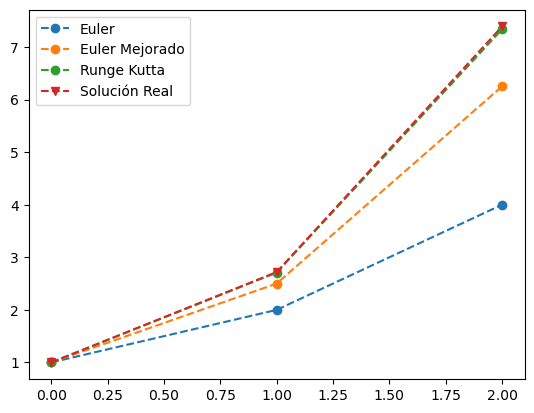

In [14]:
def f(x, y):
    return y

x0 = 0
xf = 2
N = 2
y0 = 1

# Euler
x, y = euler_N(f, x0, xf, y0, N)
plt.plot(x, y, "--o", label="Euler")

# Midpoint
x, y = euler_mejorado_N(f, x0, xf, y0, N)
plt.plot(x, y, "--o",label="Euler Mejorado")

# Runge Kutta
x, y = runge_N(f, x0, xf, y0, N)
plt.plot(x, y, "--o",label="Runge Kutta")

# Solución Real
plt.plot(x, np.exp(x), "--v", label="Solución Real")
plt.legend()


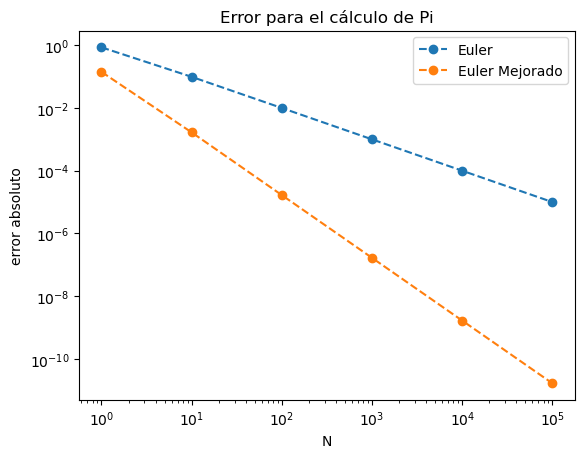

In [15]:
def f(x, y):
    return 4/(1+x**2)

x0 = 0
xf = 1
N = 100
y0 = 0

Ns = [1, 10, 100, 1000, 10_000, 100_000]
aprox_euler = []
aprox_midpoint = []

for N in Ns:
    x, y = euler_N(f, x0, xf, y0, N)
    pi_euler = y[-1]
    aprox_euler.append(abs(np.pi - pi_euler))

    x, y = euler_mejorado_N(f, x0, xf, y0, N)
    pi_midpoint = y[-1]
    aprox_midpoint.append(abs(np.pi - pi_midpoint))


plt.plot(Ns, aprox_euler, "--o", label="Euler")
plt.plot(Ns, aprox_midpoint, "--o", label="Euler Mejorado")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("N")
plt.ylabel("error absoluto")
plt.title("Error para el cálculo de Pi")
plt.legend()


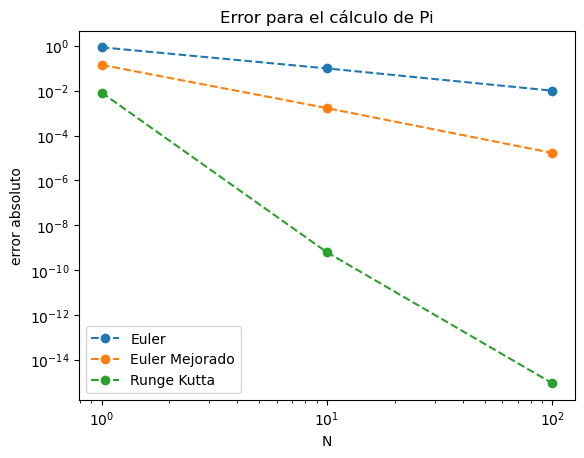

In [16]:
def f(x, y):
    return 4/(1+x**2)

x0 = 0
xf = 1
N = 100
y0 = 0

Ns = [1, 10, 100]
aprox_euler = []
aprox_midpoint = []
aprox_runge = []

for N in Ns:
    x, y = euler_N(f, x0, xf, y0, N)
    pi_euler = y[-1]
    aprox_euler.append(abs(np.pi - pi_euler))

    x, y = euler_mejorado_N(f, x0, xf, y0, N)
    pi_midpoint = y[-1]
    aprox_midpoint.append(abs(np.pi - pi_midpoint))

    x, y = runge_N(f, x0, xf, y0, N)
    pi_runge = y[-1]
    aprox_runge.append(abs(np.pi - pi_runge))

plt.plot(Ns, aprox_euler, "--o", label="Euler")
plt.plot(Ns, aprox_midpoint, "--o", label="Euler Mejorado")
plt.plot(Ns, aprox_runge, "--o", label="Runge Kutta")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("N")
plt.ylabel("error absoluto")
plt.title("Error para el cálculo de Pi")
plt.legend()


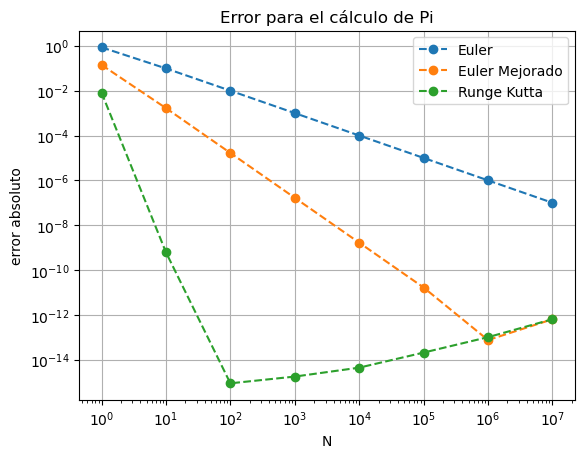

In [17]:
def f(x, y):
    return 4/(1+x**2)

x0 = 0
xf = 1
N = 100
y0 = 0

Ns = [1, 10, 100, 1000, 10_000, 100_000, 1_000_000, 10_000_000]
aprox_euler = []
aprox_midpoint = []
aprox_runge = []

for N in Ns:
    x, y = euler_N(f, x0, xf, y0, N)
    pi_euler = y[-1]
    aprox_euler.append(abs(np.pi - pi_euler))

    x, y = euler_mejorado_N(f, x0, xf, y0, N)
    pi_midpoint = y[-1]
    aprox_midpoint.append(abs(np.pi - pi_midpoint))

    x, y = runge_N(f, x0, xf, y0, N)
    pi_runge = y[-1]
    aprox_runge.append(abs(np.pi - pi_runge))

plt.plot(Ns, aprox_euler, "--o", label="Euler")
plt.plot(Ns, aprox_midpoint, "--o", label="Euler Mejorado")
plt.plot(Ns, aprox_runge, "--o", label="Runge Kutta")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("N")
plt.ylabel("error absoluto")
plt.title("Error para el cálculo de Pi")
plt.legend()
plt.grid()


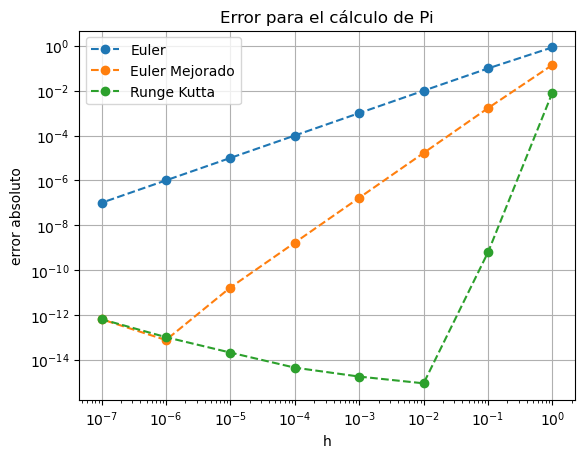

In [18]:
hs = 1/np.array(Ns)
plt.plot(hs, aprox_euler, "--o", label="Euler")
plt.plot(hs, aprox_midpoint, "--o", label="Euler Mejorado")
plt.plot(hs, aprox_runge, "--o", label="Runge Kutta")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("h")
plt.ylabel("error absoluto")
plt.title("Error para el cálculo de Pi")
plt.legend()
plt.grid()

In [11]:
# Error Redondeo

1e20  +1 - 1e20

1.0